In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

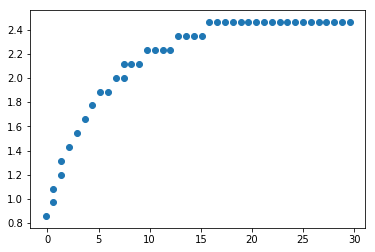

In [2]:
filename = 'C:\\Users\\F25_1.307_b\\Box Sync\\Arne\\daten.txt'
T, XiT = data_import(filename, 1)

plt.scatter(T[T<30], XiT[T<30])

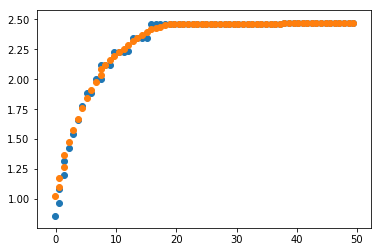

In [15]:
# creating a running average with N values to the right and left 
# for alpha parallel to a-axis

def running_average (data, N):
    ALPHA = np.zeros(2*N+1).tolist()
    j = 0
    
    for i in np.arange(-N, N+1):
        if i > 0:
            a = data[0]*np.ones(i)
            ALPHA[j] = np.append(a, data[:-i]).tolist()
        elif i<0:
            b = data[-1]*np.ones(-i)
            ALPHA[j] = np.append(data[-i:], b).tolist()
        else:
            ALPHA[j] = data.tolist()
        
        j=j+1
    
    alpha_sum = np.zeros(np.shape(ALPHA[0])[0])
    for i in np.arange(0,2*N):
        alpha_sum = alpha_sum + np.array(ALPHA[i])
        
    return alpha_sum/(2*N)


mask = T < 50
plt.scatter(T[mask], XiT[mask])
plt.scatter(T[mask], running_average(XiT, 5)[mask])

In [16]:
data = [T, XiT, running_average(XiT, 5)]
names = ['Temperature', 'XiT from paper', 'XiT running average']
units = ['', '', '']
comments = ['', '', '']
filename = 'C:\\Users\\F25_1.307_b\\Box Sync\\Arne\\running_average.txt'

save(data, names, units, comments, filename)